In [166]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML,SVG
from pydae.svg_tools import svg,grid2svg
import pydae.plot_tools as pplt
import scipy.optimize as sopt
import pydae.ssa as ssa
from pydae.urisi.lines import change_line
colors = pplt.set_style(plt)
%config InlineBackend.figure_format = 'svg'

In [167]:
from pydae.urisi.utils import report_v
from pydae.urisi.utils import get_v

In [168]:
import acdc_7bus

In [265]:
model = acdc_7bus.model()  # model instance

# powers at buses:
p_load_A1, q_load_A1 =  0.0e3, 0.0
p_load_A2, q_load_A2 =  0.0e3, 0.0
p_load_A3, q_load_A3 =  0.0e3, 0.0
p_load_A4, q_load_A4 =  0.0e3, 0.0
p_load_D2 =  0.0e3
p_load_D3 =  0.0e3
p_load_D4 =  0.0e3

# vsc powers:
p_vsc_A3 = 0.0e3
q_vsc_A3 = 0.0e3

params = { #"K_xif":0.01,
'p_load_A2_a':p_load_A2/3,'p_load_A2_b':p_load_A2/3,'p_load_A2_c':p_load_A2/3,
'q_load_A2_a':q_load_A2/3,'q_load_A2_b':q_load_A2/3,'q_load_A2_c':q_load_A2/3,
'p_load_A3_a':p_load_A3/3,'p_load_A3_b':p_load_A3/3,'p_load_A3_c':p_load_A3/3,
'q_load_A3_a':q_load_A3/3,'q_load_A3_b':q_load_A3/3,'q_load_A3_c':q_load_A3/3,
'p_load_A4_a':p_load_A4/3,'p_load_A4_b':p_load_A4/3,'p_load_A4_c':p_load_A4/3,
'q_load_A4_a':q_load_A4/3,'q_load_A4_b':q_load_A4/3,'q_load_A4_c':q_load_A4/3,
'p_load_D2':  p_load_D2,
'p_load_D3':  p_load_D3,
'p_load_D4':  p_load_D4,
'K_acdc_A4': 0*5000e3,
}

params.update({'K_charger_D3':1e-6,'K_soc_D3':0.01})
params.update({'p_c_A3':1.0,'Droop_A3':0.04,
               'H_A3':5.0,'D_A3':150.0,'X_v_A3':0.1,'T_e_A3':0.1,'K_soc_A3':0.0,
               'K_qp_A3':0.01,'K_qi_A3':0.01})

In [267]:
model.ini(params,'xy_0.json')
#model.save_xy_0('xy_1.json')
# model.step(0.1,{})
# model.report_y() # get all algebraic values
# report_v(model,'acdc_7bus.hjson'); # report voltages
# get_v(model,'A4','V_abcn_m') # get particular bus voltages (modules)
# get_v(model,'A4','V_abcn_m') # get particular bus voltages (phase to neutral modules)
# get_v(model,'A4','U_ab_m')   # get particular bus voltages (phase to phase modules)
# model.get_value('i_l_A2_0_A3_0_r')
ssa.A_eval(model)
ssa.damp_report(model).round(2)

,Real,Imag,Freq.,Damp
Mode 1,-0.01,0.00,0.00,1.00
Mode 2,-10.00,0.00,0.00,1.00
Mode 3,-23.69,0.00,0.00,1.00
Mode 4,-0.71,11.42,1.82,0.06
Mode 5,-0.71,-11.42,1.82,0.06
Mode 6,-4.89,0.00,0.00,1.00
Mode 7,-10.00,0.00,0.00,1.00
Mode 8,-0.00,0.00,0.00,1.00
Mode 9,-0.00,0.00,0.00,0.00
Mode 10,-0.00,-0.00,0.00,0.00


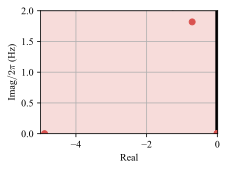

In [268]:
ssa.plot_eig(model.eigvalues,x_min=-5,x_max=0.01,y_min=0,y_max=2);


In [199]:
v_ac_a_pu_D4 = model.get_value('v_ac_a_pu_A4')
v_dc_pu_D4 = model.get_value('v_dc_pu_D4')
print(f'v_ac_pu_A4 = {v_ac_a_pu_D4:4.4f}, v_dc_pu_D4 = {v_dc_pu_D4:4.4f}')

v_ac_pu_A4 = 1.0054, v_dc_pu_D4 = 1.0035


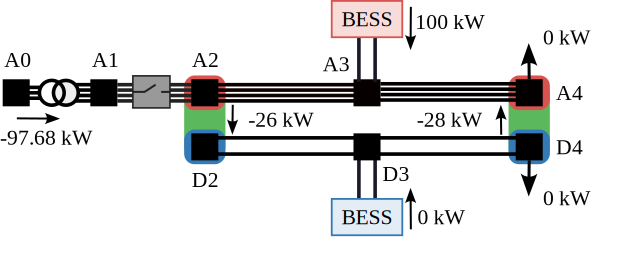

In [200]:
s = svg('acdc_7bus_bess.svg')
s.set_grid(model,'acdc_7bus.hjson')
s.set_text('PGRID',f"{model.get_value('p_A0')/1000:5.2f} kW")
s.set_text('PA2D2',f"{-model.get_value('p_vsc_A2')/1000:3.0f} kW")
s.set_text('PD4A4',f"{model.get_value('p_vsc_A4')/1000:3.0f} kW")
s.set_text('PD4A4',f"{model.get_value('p_vsc_A4')/1000:3.0f} kW")
s.set_text('PBAC',f"{model.get_value('p_pos_A3')/1000:3.0f} kW")
s.set_text('PBDC',f"{model.get_value('p_h_D3')/1000:3.0f} kW")
s.set_text('PLA4',f"{p_load_A4/1000:3.0f} kW")
s.set_text('PLD4',f"{p_load_D4/1000:3.0f} kW")

s.set_tooltips('acdc_7bus_bess_tooltips_woDC.svg')    
SVG('acdc_7bus_bess_tooltips_woDC.svg')

In [201]:
model.report_y()

V_A0_0_r = 11547.03
V_A0_0_i =  0.28
V_A0_1_r = -5773.27
V_A0_1_i = -10000.17
V_A0_2_r = -5773.76
V_A0_2_i = 9999.88
V_A1_0_r = 200.63
V_A1_0_i = -114.81
V_A1_1_r = -199.74
V_A1_1_i = -116.38
V_A1_2_r = -0.93
V_A1_2_i = 231.16
V_A1_3_r = -0.00
V_A1_3_i = -0.01
V_A2_0_r = 200.61
V_A2_0_i = -114.81
V_A2_1_r = -199.73
V_A2_1_i = -116.36
V_A2_2_r = -0.91
V_A2_2_i = 231.15
V_A2_3_r = -0.00
V_A2_3_i = -0.01
V_A3_0_r = 202.63
V_A3_0_i = -114.95
V_A3_1_r = -200.79
V_A3_1_i = -117.86
V_A3_2_r = -1.79
V_A3_2_i = 232.66
V_A3_3_r = -0.08
V_A3_3_i =  0.12
V_A4_0_r = 201.80
V_A4_0_i = -114.88
V_A4_1_r = -200.38
V_A4_1_i = -117.27
V_A4_2_r = -1.47
V_A4_2_i = 232.13
V_A4_3_r =  0.01
V_A4_3_i = -0.01
V_D2_0_r = 400.00
V_D2_0_i =  0.00
V_D2_1_r = -400.00
V_D2_1_i =  0.00
V_D3_0_r = 400.69
V_D3_0_i =  0.00
V_D3_1_r = -400.69
V_D3_1_i =  0.00
V_D4_0_r = 401.39
V_D4_0_i =  0.00
V_D4_1_r = -401.39
V_D4_1_i =  0.00
i_load_A2_a_r =  0.00
i_load_A2_a_i =  0.00
i_load_A2_b_r =  0.00
i_load_A2_b_i =  0.00
i_load

In [202]:
model = acdc_7bus.model()  # model instance
params.update({'K_charger_D3':1e-6,
               'p_load_A4_a':p_load_A4/3,'p_load_A4_b':p_load_A4/3,'p_load_A4_c':p_load_A4/3,
               'H_A3':15,'Droop_A3':0.05,'D_A3':0.0,'X_v_A3':0.2, 'p_c_A3':1,'K_delta_A3':0.0})
model.ini(params,'xy_0.json')
#model.report_u()
# model.report_x()
model.report_z()

ssa.A_eval(model)
ssa.damp_report(model).round(2)

i_l_A2_0_A3_0_r = -88.21
i_l_A2_0_A3_0_i = 49.01
i_l_A2_1_A3_1_r = 88.43
i_l_A2_1_A3_1_i = 52.08
i_l_A2_2_A3_2_r =  0.20
i_l_A2_2_A3_2_i = -105.45
i_l_A2_3_A3_3_r = -0.41
i_l_A2_3_A3_3_i =  4.37
i_l_A3_0_A4_0_r = 36.67
i_l_A3_0_A4_0_i = -20.87
i_l_A3_1_A4_1_r = -35.14
i_l_A3_1_A4_1_i = -20.56
i_l_A3_2_A4_2_r = -0.24
i_l_A3_2_A4_2_i = 37.63
i_l_A3_3_A4_3_r = -1.29
i_l_A3_3_A4_3_i =  3.80
i_l_D2_0_D3_0_r = -32.93
i_l_D2_0_D3_0_i = -0.00
i_l_D2_1_D3_1_r = 32.93
i_l_D2_1_D3_1_i = -0.00
i_l_D3_0_D4_0_r = -32.93
i_l_D3_0_D4_0_i =  0.00
i_l_D3_1_D4_1_r = 32.93
i_l_D3_1_D4_1_i =  0.00
i_t_A0_A1_1_0_r = -2.80
i_t_A0_A1_1_0_i = -0.04
i_t_A0_A1_1_1_r =  1.40
i_t_A0_A1_1_1_i =  2.48
i_t_A0_A1_1_2_r =  1.40
i_t_A0_A1_1_2_i = -2.44
i_t_A0_A1_2_0_r = 121.19
i_t_A0_A1_2_0_i = -67.89
i_t_A0_A1_2_1_r = -121.26
i_t_A0_A1_2_1_i = -71.21
i_t_A0_A1_2_2_r = -0.35
i_t_A0_A1_2_2_i = 143.45
i_t_A0_A1_2_3_r =  0.42
i_t_A0_A1_2_3_i = -4.35
v_anm_A2 = 231.14
v_bnm_A2 = 231.16
v_cnm_A2 = 231.14
v_anm_A3 = 232.97
v_

,Real,Imag,Freq.,Damp
Mode 1,-0.01,0.00,0.00,1.00
Mode 2,-10.00,0.00,0.00,1.00
Mode 3,1.67,6.79,1.08,-0.24
Mode 4,1.67,-6.79,1.08,-0.24
Mode 5,-13.45,0.00,0.00,1.00
Mode 6,-4.89,0.00,0.00,1.00
Mode 7,-10.00,0.00,0.00,1.00
Mode 8,-0.00,0.00,0.00,1.00
Mode 9,-0.00,0.00,0.00,0.00
Mode 10,-0.00,-0.00,0.00,0.00


In [203]:
model = acdc_7bus.model()  # model instance
model.Dt = 0.01

params.update({'K_charger_D3':0.0000001,'K_soc_D3':0.001})
p_load_A4, q_load_A4 =  0.0e3, 0.0
params.update({'p_load_A4_a':p_load_A4/3,'p_load_A4_b':p_load_A4/3,'p_load_A4_c':p_load_A4/3})

model.ini(params,'xy_0.json')
model.run(1.0,{})

p_load_A4, q_load_A4 =  300.0e3, 0.0
params.update({'p_load_A4_a':p_load_A4/3,'p_load_A4_b':p_load_A4/3,'p_load_A4_c':p_load_A4/3})
model.run(15.0,params)

model.post();

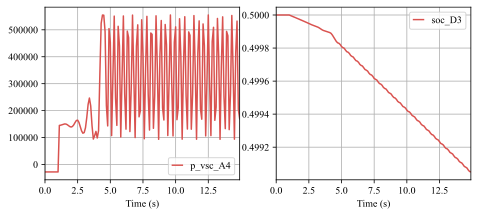

In [204]:
layout = [[['p_vsc_A4'],
           ['soc_D3']]]
pplt.plot(model,layout=layout);

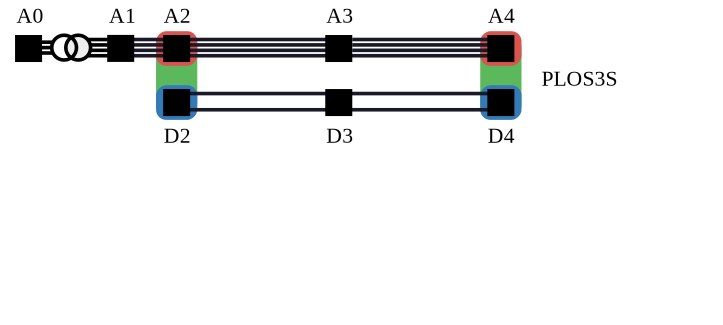

In [205]:
s = svg('acdc_7bus_brk.svg')
s.set_grid(model,'acdc_7bus.hjson')
s.set_text('PLOSS',f"{model.get_value('p_A0')/1000:5.2f} kW")
s.set_tooltips('acdc_7bus_brk_tooltips.svg')    
SVG('acdc_7bus_brk.svg')

In [262]:
model = acdc_7bus.model()  # model instance
model.Dt = 0.01

params.update({'K_charger_D3':1e-6,'K_soc_D3':1, 'u_brk_A1':1.0, 'soc_ref_D3':0.7})
# params.update({'p_c_A3':0.8,'Droop_A3':0.05,
#                'H_A3':5.0,'D_A3':400,'X_v_A3':0.1,'T_e_A3':0.05,'K_soc_A3':0.0,
#                'T_pfr_A3':2,
#                'K_qp_A3':0.001,'K_qi_A3':100})

p_load_A4, q_load_A4 =  200.0e3, 0.0
params.update({'p_load_A4_a':p_load_A4/3,'p_load_A4_b':p_load_A4/3,'p_load_A4_c':p_load_A4/3})

model.ini(params,'xy_0.json')
model.run(1.0,{})

params.update({'u_brk_A1':1e-5})
model.run(1.02,params)
params.update({'u_brk_A1':1e-6})
model.run(1.04,params)
params.update({'u_brk_A1':1e-10})

model.run(15.0,params)

model.post();

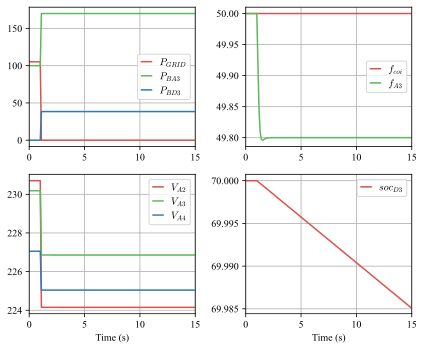

In [263]:
layout = [[['p_A0','p_vsc_A4','p_h_D3','p_pos_A3'],['soc_D3']]]
fig,axes = plt.subplots(nrows=2,ncols=2, figsize=(6,5))

axes[0,0].plot(model.Time,model.get_values('p_A0')/1000, label = r'$P_{GRID}$') 
axes[0,0].plot(model.Time,model.get_values('p_pos_A3')/1000, label = r'$P_{BA3}$') 
axes[0,0].plot(model.Time,model.get_values('p_h_D3')/1000, label = r'$P_{BD3}$') 

axes[0,1].plot(model.Time,model.get_values('omega_coi')*50, label = r'$f_{coi}$') 
axes[0,1].plot(model.Time,model.get_values('omega_A3')*50, label = r'$f_{A3}$') 

for item,label in zip(['v_anm_A2','v_anm_A3','v_anm_A4'],['$V_{A2}$','$V_{A3}$','$V_{A4}$']):
    axes[1,0].plot(model.Time,model.get_values(item), label = label) 

axes[1,1].plot(model.Time,model.get_values('soc_D3')*100, label = r'$soc_{D3}$') 


for ax in axes.flatten():
    ax.legend()
    ax.grid()
    ax.set_xlim(0,15)
    ax.ticklabel_format(useOffset=False)

axes[1,0].set_xlabel('Time (s)')
axes[1,1].set_xlabel('Time (s)')
fig.tight_layout()

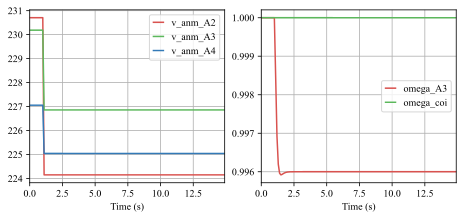

In [247]:
layout = [[['v_anm_A2','v_anm_A3','v_anm_A4'],['omega_A3','omega_coi']]]
pplt.plot(model,layout=layout);

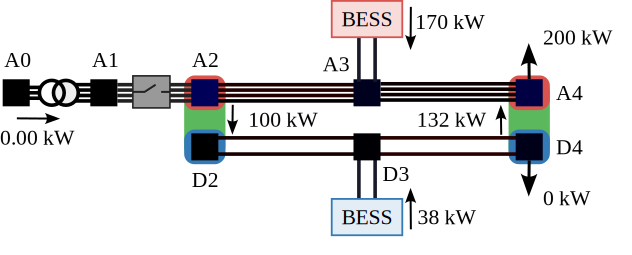

In [264]:
s = svg('acdc_7bus_bess.svg')
s.set_grid(model,'acdc_7bus.hjson')
s.set_text('PGRID',f"{model.get_value('p_A0')/1000:5.2f} kW")
s.set_text('PA2D2',f"{-model.get_value('p_vsc_A2')/1000:3.0f} kW")
s.set_text('PD4A4',f"{model.get_value('p_vsc_A4')/1000:3.0f} kW")
s.set_text('PBAC',f"{model.get_value('p_pos_A3')/1000:3.0f} kW")
s.set_text('PBDC',f"{model.get_value('p_h_D3')/1000:3.0f} kW")
s.set_text('PLA4',f"{p_load_A4/1000:3.0f} kW")
s.set_text('PLD4',f"{p_load_D4/1000:3.0f} kW")

s.set_tooltips('acdc_7bus_bess_tooltips_woDC.svg')    
SVG('acdc_7bus_bess_tooltips_woDC.svg')

In [209]:
p_min = 1e8
p_vsc_min = 0.0
for p_vsc_A4 in np.linspace(-100e3,100e3,200):
   params.update({'p_vsc_a_A4':p_vsc_A4/3,'p_vsc_b_A4':p_vsc_A4/3,'p_vsc_c_A4':p_vsc_A4/3,})
   model.ini(params)
   model.step(0.001,{})
   p_total = model.get_value('p_A1')
   if p_total < p_min:
       p_min = p_total
       p_vsc_min = p_vsc_A3
   print(f"VSC A4 power = {p_vsc_A4/1000:8.3f} kW, Total power = {p_total/1000:5.3f} kW")
print(f"Minimum: VSC A4 power = {p_vsc_min/1000:8.3f} kW, Total power = {p_min/1000:5.3f} kW")

Input or parameter p_vsc_a_A4 not found.
Input or parameter p_vsc_b_A4 not found.
Input or parameter p_vsc_c_A4 not found.
Maximum number of iterations (max_it = 50) reached without convergence.


TypeError: '<' not supported between instances of 'NoneType' and 'float'

In [ ]:
data_line_code = {"R":[[ 0.211, 0.049, 0.049, 0.049],[ 0.049, 0.211, 0.049, 0.049], [ 0.049, 0.049, 0.211, 0.049], [ 0.049, 0.049, 0.049, 0.211]],
                  "X":[[ 0.747, 0.673, 0.651, 0.673],[ 0.673, 0.747, 0.673, 0.651], [ 0.651, 0.673, 0.747, 0.673], [ 0.673, 0.651, 0.673, 0.747]], "I_max":430.0}

change_line(model,'A2','A3',data_line_code, 100)
model.ini(params,'xy_0.json')

True

In [56]:
model.report_z()

i_l_A2_0_A3_0_r = -0.57
i_l_A2_0_A3_0_i =  3.02
i_l_A2_1_A3_1_r =  2.90
i_l_A2_1_A3_1_i = -1.01
i_l_A2_2_A3_2_r = -2.33
i_l_A2_2_A3_2_i = -2.00
i_l_A2_3_A3_3_r =  0.01
i_l_A2_3_A3_3_i =  0.01
i_l_A3_0_A4_0_r = -107.37
i_l_A3_0_A4_0_i = -100.26
i_l_A3_1_A4_1_r = -32.90
i_l_A3_1_A4_1_i = 142.75
i_l_A3_2_A4_2_r = 139.82
i_l_A3_2_A4_2_i = -42.51
i_l_A3_3_A4_3_r =  0.45
i_l_A3_3_A4_3_i =  0.02
i_l_D2_0_D3_0_r =  1.75
i_l_D2_0_D3_0_i =  0.00
i_l_D2_1_D3_1_r = -1.75
i_l_D2_1_D3_1_i =  0.00
i_l_D3_0_D4_0_r =  1.75
i_l_D3_0_D4_0_i =  0.00
i_l_D3_1_D4_1_r = -1.75
i_l_D3_1_D4_1_i =  0.00
i_t_A0_A1_1_0_r = -0.05
i_t_A0_A1_1_0_i =  0.01
i_t_A0_A1_1_1_r =  0.03
i_t_A0_A1_1_1_i =  0.04
i_t_A0_A1_1_2_r =  0.02
i_t_A0_A1_1_2_i = -0.05
i_t_A0_A1_2_0_r =  2.05
i_t_A0_A1_2_0_i = -1.63
i_t_A0_A1_2_1_r = -2.43
i_t_A0_A1_2_1_i = -0.96
i_t_A0_A1_2_2_r =  0.38
i_t_A0_A1_2_2_i =  2.59
i_t_A0_A1_2_3_r =  0.00
i_t_A0_A1_2_3_i =  0.00
v_anm_A2 = 229.88
v_bnm_A2 = 229.90
v_cnm_A2 = 229.88
v_anm_A3 = 229.88
v_bnm_A3